# Oracle: Quantum Fourier Transform

In [2]:
#=============================================================================#
#                            Importing packages                               #
#=============================================================================#
import numpy as np
from qiskit import QuantumCircuit, Aer, execute,IBMQ
from qiskit.providers.ibmq import least_busy 
provider = IBMQ.load_account()
from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2022-05-09 13:02:59,196: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
#=============================================================================#
#                                  Functions                                  #
#=============================================================================#
def QFT_algorithm(n):
    QFT_circuit = QuantumCircuit(n+1,n) # Inputs: n+1 ; Outputs: n
    # Use barrier
    QFT_circuit.barrier()
    # Oracle gate:
    # Loop for creating the oracle
    for i in range(n):
        # Hadamard Gate:
        QFT_circuit.h(i)
        k = 2 # Rotation Parameter
        # Unitary Control Rotation Gate:
        for j in range(i+1,n+1):
            QFT_circuit.cp(2*np.pi/(2**k), i, j) 
            k += 1

    # Measure:
    for i in range(n):
        QFT_circuit.measure(i, i) # Measure qubit 'i' 
                                  # and store the measure in bit 'i'
    # Use barrier
    QFT_circuit.barrier()
    return QFT_circuit


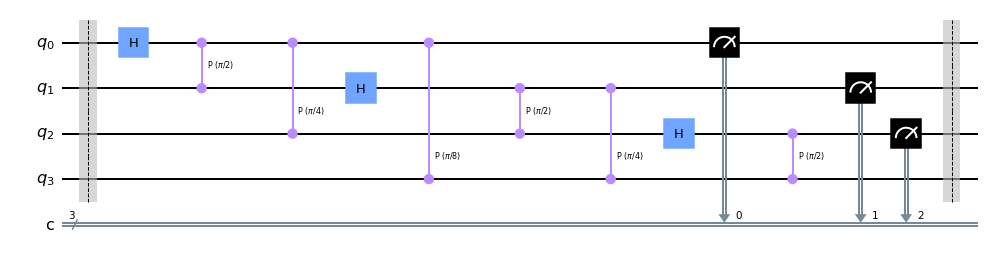

In [5]:
#=============================================================================#
#                               Circuit Plot                                  #
#=============================================================================#
n = 3
QFT_circuit = QFT_algorithm(n)
QFT_circuit.draw(output='mpl')

/Users/sergiolopezbanos/Library/Python/3.8/lib/python/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/sergiolopezbanos/Library/Python/3.8/lib/python/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


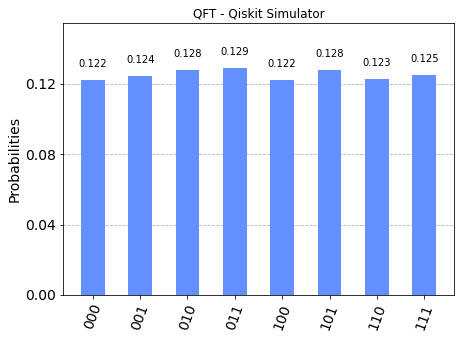

In [6]:
#=============================================================================#
#                Execution in Local Simulator (absense of noise)              #
#=============================================================================#
backend = Aer.get_backend('qasm_simulator')
job = execute(QFT_circuit,backend,shots = 10000)
result = job.result()
counts = result.get_counts(QFT_circuit)
plot_histogram(counts,title="QFT - Qiskit Simulator")

In [8]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

qc = inverse_qft(QFT_circuit, n)
qc.measure_all()
qc.draw()

NameError: name 'qft' is not defined

In [123]:
#=============================================================================#
#         Execution in real quantum machine via IBM Quantum Experience        #
#=============================================================================#
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (n+1) and 
not x.configuration().simulator and x.status().operational == True))

print("least busy backend: ", backend)

QFT_circuit = QFT_algorithm(n)
job = execute(QFT_circuit,backend=backend,shots = 10000, optimization_level= 3)

least busy backend:  ibmq_belem


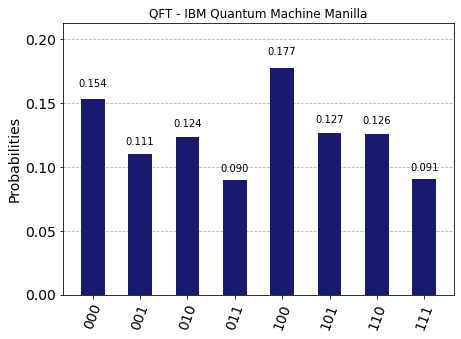

In [124]:
# Get the results and plot the histogram
result = job.result()
counts = result.get_counts()
plot_histogram(counts,color='midnightblue', title="QFT - IBM Quantum Machine Manilla")